# Práctica Calificada 1 - Grupo 2: Modelado de Series de Tiempo (Parte 2 - Deep Learning)

**Objetivo:** Este notebook se enfoca en la implementación de un modelo de Deep Learning (LSTM) para predecir la demanda de productos.

## 1. Carga de Librerías y Datos

Repetimos los pasos iniciales de carga de datos para que este notebook sea auto-suficiente.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15, 8)

print("Librerías cargadas exitosamente.")

Librerías cargadas exitosamente.


In [2]:
# Definir el path y cargar los datos
project_root = Path().resolve().parents[0]
PROCESSED_DATA_PATH = project_root / 'data' / 'processed' / 'group2_data.parquet'
df = pd.read_parquet(PROCESSED_DATA_PATH)

# Asegurarse que la fecha sea el tipo correcto
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

# Calcular el producto con mayor ingreso total
top_products = df.groupby('product_sku')["total_product_revenue_usd"].sum().nlargest(10)
top_product_sku = top_products.index[0]

# Filtrar el DataFrame para obtener la serie de tiempo de un solo producto
ts_one_product = df[df["product_sku"] == top_product_sku].copy()
ts_one_product.set_index('transaction_date', inplace=True)
ts_one_product = ts_one_product.asfreq('D').fillna(0) # Asegurar frecuencia diaria

# Seleccionar la variable objetivo
target_col = 'total_product_quantity'
ts = ts_one_product[[target_col]] # Mantener como DataFrame

print(f"Datos preparados para el producto: {top_product_sku}")

Datos preparados para el producto: GGOEGDHQ015399


## 2. Modelado de Deep Learning: LSTM

Implementaremos un modelo de Deep Learning usando una red **LSTM (Long Short-Term Memory)**.

El proceso consta de los siguientes pasos:
1. **Escalado de Datos**: Normalizaremos los datos entre 0 y 1.
2. **Creación de Secuencias**: Transformaremos la serie en secuencias de entrada y salidas (ej. usar 30 días para predecir el siguiente).
3. **Construcción del Modelo**: Definiremos la arquitectura de la red LSTM usando Keras/TensorFlow.
4. **Entrenamiento**: Entrenaremos el modelo.
5. **Predicción y Evaluación**: Haremos predicciones, las devolveremos a su escala original y calcularemos las métricas de error.

C:\Users\jeffr\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - loss: 0.0046 - val_loss: 0.0027
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0045 - val_loss: 0.0027
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0046 - val_loss: 0.0028
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0044 - val_loss: 0.0026
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0045 - val_loss: 0.0027
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0045 - val_loss: 0.0027
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0045 - val_loss: 0.0026
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0046 - val_l

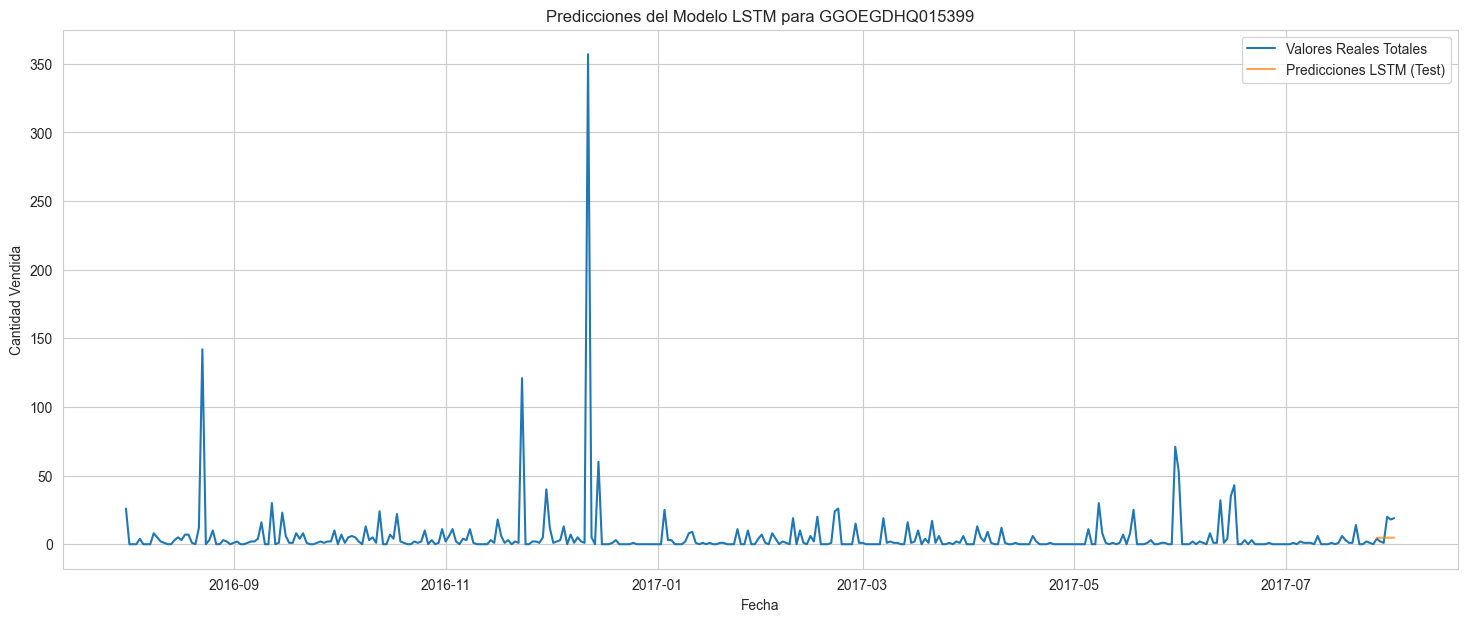

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# --- 1. Escalado de Datos ---
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ts)

# Dividir datos en train/test (usando el set escalado)
train_size = int(len(scaled_data) * 0.9)
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# --- 2. Creación de Secuencias ---
def create_sequences(dataset, look_back=30):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 30
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

# Reshape para el formato de LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# --- 3. Construcción del Modelo ---
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# --- 4. Entrenamiento ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=100, 
                    validation_split=0.1, 
                    callbacks=[early_stop], 
                    verbose=1)

# --- 5. Predicción y Evaluación ---
# Hacer predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la escala de las predicciones
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform([y_test])

# Calcular métricas de error en el set de prueba
mae_lstm = mean_absolute_error(y_test_inv[0], test_predict[:,0])
rmse_lstm = np.sqrt(mean_squared_error(y_test_inv[0], test_predict[:,0]))
print(f'Error Absoluto Medio (MAE) con LSTM: {mae_lstm:.2f}')
print(f'Raíz del Error Cuadrático Medio (RMSE) con LSTM: {rmse_lstm:.2f}')

# --- 6. Visualización ---
# Crear un DataFrame con las predicciones para graficar
test_timestamps = ts.index[train_size + look_back + 1:]
df_pred_lstm = pd.DataFrame({'real': y_test_inv[0], 'prediccion_lstm': test_predict[:,0]}, index=test_timestamps)

plt.figure(figsize=(18, 7))
plt.plot(ts, label='Valores Reales Totales')
plt.plot(df_pred_lstm['prediccion_lstm'], label='Predicciones LSTM (Test)', alpha=0.7)
plt.title(f'Predicciones del Modelo LSTM para {top_product_sku}')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.show()